# Multiple Linear Regression

## Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [ ]:
dataset = pd.read_csv('ds_salaries.csv')

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [ ]:
dataset.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [ ]:
dataset.experience_level.value_counts()

SE    280
MI    213
EN     88
EX     26
Name: experience_level, dtype: int64

In [ ]:
# Drop unnecessary columns
dataset = dataset.drop(columns = ['Unnamed: 0', 'salary', 'salary_currency'])

In [ ]:
#move column 'salary_in_usd' to the end
dataset = dataset[[col for col in dataset.columns if col != 'salary_in_usd'] + ['salary_in_usd']]

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   employee_residence  607 non-null    object
 5   remote_ratio        607 non-null    int64 
 6   company_location    607 non-null    object
 7   company_size        607 non-null    object
 8   salary_in_usd       607 non-null    int64 
dtypes: int64(3), object(6)
memory usage: 42.8+ KB


In [ ]:
# Group job titles
conditions = [
    dataset['job_title'].str.contains('Scientist|Researcher', case=False),
    dataset['job_title'].str.contains('Engineer|Architect|Developer', case=False),
    dataset['job_title'].str.contains('Analyst|Specialist', case=False),
    dataset['job_title'].str.contains('Manager|Lead', case=False),
    dataset['job_title'].str.contains('Director', case=False),
    dataset['job_title'].str.contains('Consultant', case=False)
]

# Assign corresponding values based on conditions
values = ['Scientist', 'Engineer', 'Analyst', 'Manager', 'Director', 'Consultant']

# Create a new Series with the mapped values
group_job_title = np.select(conditions, values, default='Other')

# Add the new column (named 'group_job_title') to the DataFrame
dataset['group_job_title'] = group_job_title

# Move the column beside job_title
col = dataset.pop('group_job_title')
dataset.insert(4, col.name, col)

In [ ]:
# Group employee_residence and company_location
# Define the list of countries to check for
countries_to_check = ['US', 'GB', 'IN', 'CA', 'DE', 'FR', 'ES']

#Apply the condition and replace values for 'employee_residence' column
employee_residence_condition = dataset['employee_residence'].str.upper().str.contains('|'.join(countries_to_check), case=False)
dataset['employee_residence'] = np.where(employee_residence_condition, dataset['employee_residence'], 'Other')

# Apply the condition and replace values for 'company_location' column
company_location_condition = dataset['company_location'].str.upper().str.contains('|'.join(countries_to_check), case=False)
dataset['company_location'] = np.where(company_location_condition, dataset['company_location'], 'Other')

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   group_job_title     607 non-null    object
 5   employee_residence  607 non-null    object
 6   remote_ratio        607 non-null    int64 
 7   company_location    607 non-null    object
 8   company_size        607 non-null    object
 9   salary_in_usd       607 non-null    int64 
dtypes: int64(3), object(7)
memory usage: 47.5+ KB


In [ ]:
dataset.company_location.value_counts()

US       355
Other     94
GB        47
CA        30
DE        28
IN        24
FR        15
ES        14
Name: company_location, dtype: int64

In [ ]:
dataset = dataset.drop(columns = ['job_title'])

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   group_job_title     607 non-null    object
 4   employee_residence  607 non-null    object
 5   remote_ratio        607 non-null    int64 
 6   company_location    607 non-null    object
 7   company_size        607 non-null    object
 8   salary_in_usd       607 non-null    int64 
dtypes: int64(3), object(6)
memory usage: 42.8+ KB


In [ ]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 8].values

## Encoding categorical data and Splitting to Train and Test Set

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

columns_to_encode = [1, 2, 3, 4, 6, 7]

# Create a ColumnTransformer to apply one-hot encoding to the specified columns
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), columns_to_encode)], remainder='passthrough')

# Fit and transform the ColumnTransformer on X
X_encoded = ct.fit_transform(X)

# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=0)

In [ ]:
# Get the feature names for one-hot encoded columns
one_hot_encoder = ct.named_transformers_['encoder']
encoded_feature_names = one_hot_encoder.get_feature_names_out(input_features=dataset.columns[columns_to_encode])

# Columns that were not one-hot encoded
columns_not_encoded = [0, 5]

# Create a list of feature names for non-encoded columns
feature_names_not_encoded = dataset.columns[columns_not_encoded].tolist()

# Combine feature names of one-hot encoded and non-encoded columns into a single list
all_feature_names = list(encoded_feature_names) + feature_names_not_encoded

# Print the combined list of feature names
print(all_feature_names)

# Print the first row of X_train with feature names
first_row = X_train[0].toarray().tolist()
print("First Row of X_train:")
for feature_name, value in zip(all_feature_names, first_row):
    print(f"{feature_name}: {value}")

['experience_level_EN', 'experience_level_EX', 'experience_level_MI', 'experience_level_SE', 'employment_type_CT', 'employment_type_FL', 'employment_type_FT', 'employment_type_PT', 'group_job_title_Analyst', 'group_job_title_Consultant', 'group_job_title_Director', 'group_job_title_Engineer', 'group_job_title_Manager', 'group_job_title_Other', 'group_job_title_Scientist', 'employee_residence_CA', 'employee_residence_DE', 'employee_residence_ES', 'employee_residence_FR', 'employee_residence_GB', 'employee_residence_IN', 'employee_residence_Other', 'employee_residence_US', 'company_location_CA', 'company_location_DE', 'company_location_ES', 'company_location_FR', 'company_location_GB', 'company_location_IN', 'company_location_Other', 'company_location_US', 'company_size_L', 'company_size_M', 'company_size_S', 'work_year', 'remote_ratio']
First Row of X_train:
experience_level_EN: [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0

In [ ]:
print(X_train.shape)
print(X_test.shape)

(485, 36)
(122, 36)


## Training the Multiple Linear Regression model on the Training set

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

# Model Performance Measures

In [ ]:
import statsmodels.api as sm

# Calculate the R-squared value
r_squared = regressor.score(X_test, y_test)

# Get the number of observations and the number of predictors
n = X_test.shape[0]
k = X_test.shape[1]

# Calculate the adjusted R-squared
adjusted_r_squared = 1 - (1 - r_squared) * (n - 1) / (n - k - 1)

print("R-squared:", r_squared)
print("Adjusted R-squared:", adjusted_r_squared)

R-squared: 0.4688973858129938
Adjusted R-squared: 0.24395980803967343


# Getting the final linear regression equation with the values of the coefficients

In [ ]:
# Get coefficients and intercept
coefficients = np.append(regressor.intercept_, regressor.coef_)
print(coefficients)

[ 6.79074110e+06 -4.14597355e+04  6.00119650e+04 -2.11077936e+04
  2.55556419e+03 -1.63903472e+04 -1.44914915e+04  1.59692168e+04
  1.49126219e+04 -2.92557261e+04 -5.07709677e+03  2.91134675e+04
  4.62348295e+02  2.08639842e+03 -4.80079672e+03  7.47140542e+03
  1.70292739e+04 -1.37229100e+04  1.60312807e+04 -2.60932746e+04
 -9.67452906e+02 -2.41218035e+04 -2.16604504e+04  5.35053369e+04
 -3.31797230e+03  1.77605567e+04 -3.96555509e+04  1.90770943e+04
  1.27657116e+04 -2.32299084e+04  5.61240564e+03  1.09876633e+04
  1.01978613e+04 -4.31358997e+03 -5.88427136e+03 -3.32455348e+03
  8.34770258e+01]


In [ ]:
# Calculate residuals
y_pred = regressor.predict(X_train)
residuals = y_train - y_pred

In [ ]:
X_train.shape

(485, 36)

In [ ]:
# Calculate the standard errors of the coefficients
X_train_dense = X_train.toarray()  # Convert X_train to a dense array
X_train_with_intercept = np.column_stack((np.ones(X_train_dense.shape[0]), X_train_dense))  # Add a column of ones for the intercept
mse = np.mean(residuals ** 2)  # Mean squared error
covariance_matrix = np.linalg.pinv(np.dot(X_train_with_intercept.T, X_train_with_intercept)) * mse
se = np.sqrt(np.diag(covariance_matrix))

In [ ]:
from scipy import stats

# Degrees of freedom
dof = X_train_with_intercept.shape[0] - len(coefficients)

# Calculate t-statistics, p-values, and confidence intervals
t_statistics = coefficients / se
p_values = [2 * (1 - stats.t.cdf(np.abs(t), dof)) for t in t_statistics]
alpha = 0.05
t_critical = stats.t.ppf(1 - alpha / 2, dof)
margin_of_error = t_critical * se
confidence_intervals = np.column_stack((coefficients - margin_of_error, coefficients + margin_of_error))

# Create a DataFrame to display the results
import pandas as pd

feature_names = ['Intercept'] + all_feature_names  # Include 'Intercept' as the first feature name
results_df = pd.DataFrame({'Feature': feature_names,
                           'Coefficient': coefficients,
                           'Standard Error': se,
                           't-Statistic': t_statistics,
                           'p-Value': p_values,
                           'Lower CI': confidence_intervals[:, 0],
                           'Upper CI': confidence_intervals[:, 1]})

# Display the results
print(results_df)

                       Feature   Coefficient  Standard Error  t-Statistic  \
0                    Intercept  6.790741e+06    3.643807e+06     1.863639   
1          experience_level_EN -4.145974e+04    9.184860e+05    -0.045139   
2          experience_level_EX  6.001196e+04    9.193129e+05     0.065279   
3          experience_level_MI -2.110779e+04    9.189184e+05    -0.022970   
4          experience_level_SE  2.555564e+03    9.195688e+05     0.002779   
5           employment_type_CT -1.639035e+04    9.167865e+05    -0.017878   
6           employment_type_FL -1.449149e+04    9.192144e+05    -0.015765   
7           employment_type_FT  1.596922e+04    9.204666e+05     0.017349   
8           employment_type_PT  1.491262e+04    9.205941e+05     0.016199   
9      group_job_title_Analyst -2.925573e+04    5.257501e+05    -0.055646   
10  group_job_title_Consultant -5.077097e+03    5.247412e+05    -0.009675   
11    group_job_title_Director  2.911347e+04    5.251711e+05     0.055436   

In [ ]:
upper_ci = confidence_intervals[:, 1]
print(upper_ci)

[1.39518173e+07 1.76361634e+06 1.86671308e+06 1.78481811e+06
 1.80975952e+06 1.78534564e+06 1.79201609e+06 1.82493762e+06
 1.82413167e+06 1.00398700e+06 1.02618288e+06 1.06121823e+06
 1.03308060e+06 1.03233685e+06 1.02972855e+06 1.04041592e+06
 9.27320176e+05 8.87736502e+05 9.13241573e+05 8.76611895e+05
 9.06036240e+05 8.82120791e+05 8.81127004e+05 9.58789902e+05
 8.98031910e+05 9.22823475e+05 8.72631820e+05 9.23234839e+05
 9.15574153e+05 8.78518940e+05 9.09160324e+05 9.13891577e+05
 2.41698865e+06 2.40709685e+06 2.40065243e+06 4.60332018e+03
 1.92588919e+02]


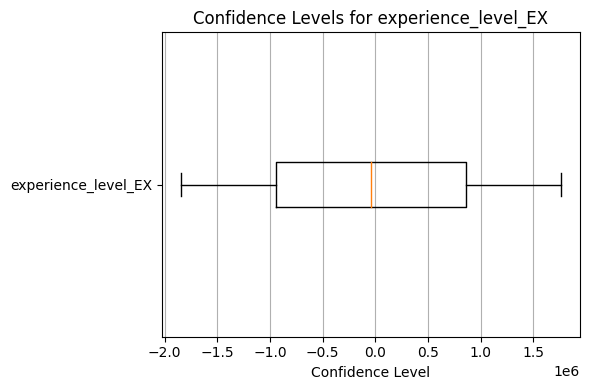

In [ ]:
# Select a specific coefficient's confidence interval and label
coefficient_index = 1  # Change this to the index of the coefficient you want to visualize
confidence_interval = confidence_intervals[coefficient_index]
coefficient_label = all_feature_names[coefficient_index]

# Create a box plot for the selected coefficient
plt.figure(figsize=(6, 4))
plt.boxplot([confidence_interval], labels=[coefficient_label], vert=False)
plt.xlabel('Confidence Level')
plt.title(f'Confidence Levels for {coefficient_label}')
plt.grid(axis='x')
plt.tight_layout()

# Show the box plot
plt.show()


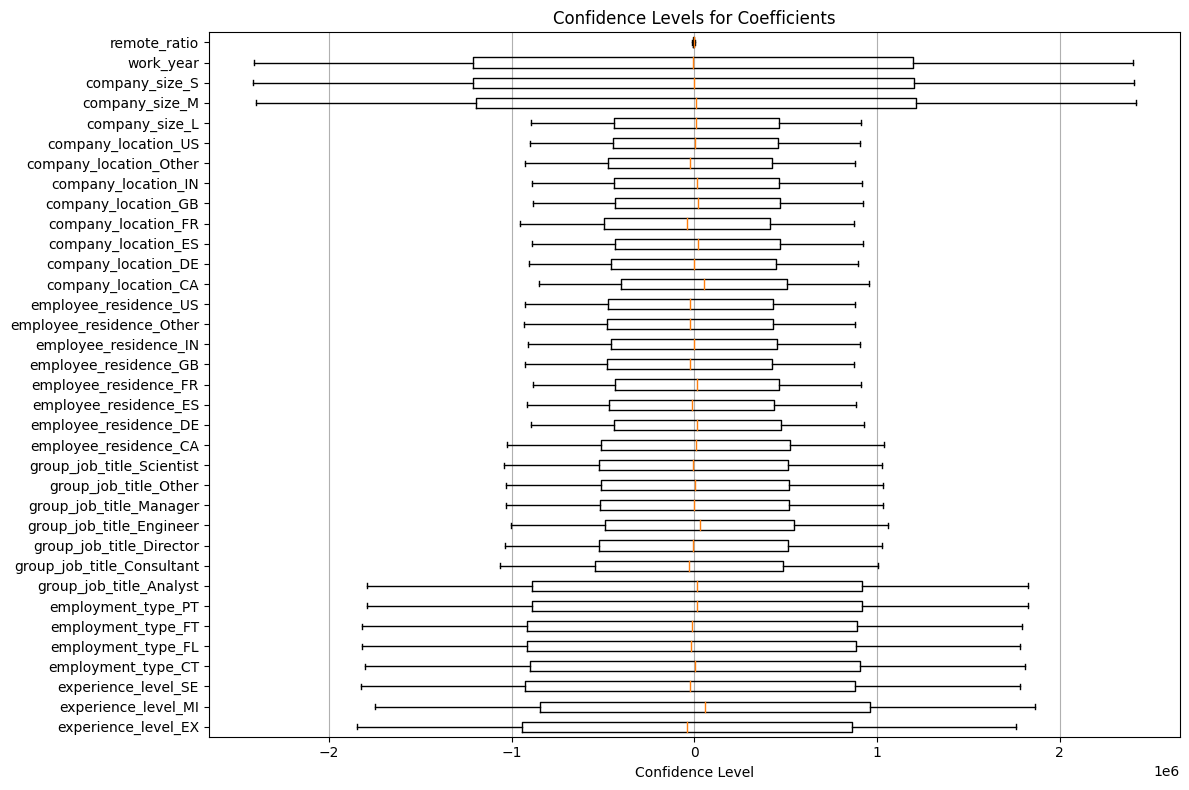

In [ ]:
# Initialize empty lists to store data and labels for box plots
boxplot_data = []
boxplot_labels = []

# Loop through coefficients, confidence intervals, and labels
for coefficient_index in range(1, len(all_feature_names)):  # Start from index 1 to exclude 'Intercept'
    coefficient_label = all_feature_names[coefficient_index]
    confidence_interval = confidence_intervals[coefficient_index]

    # Append the confidence interval data and label
    boxplot_data.append(confidence_interval)
    boxplot_labels.append(coefficient_label)

# Create a figure for all box plots
plt.figure(figsize=(12, 8))

# Create the box plots
plt.boxplot(boxplot_data, labels=boxplot_labels, vert=False)
plt.xlabel('Confidence Level')
plt.title('Confidence Levels for Coefficients')
plt.grid(axis='x')
plt.tight_layout()

# Show the box plots
plt.show()

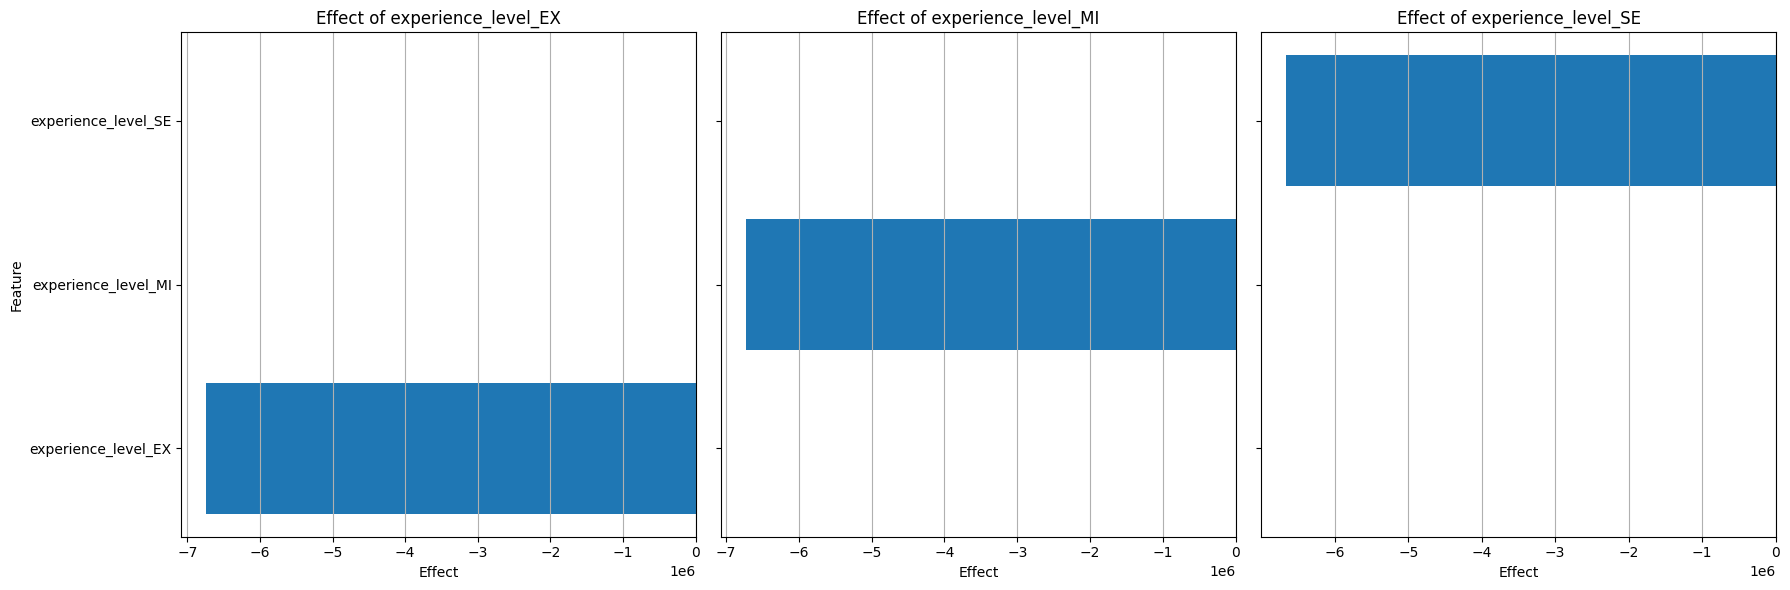

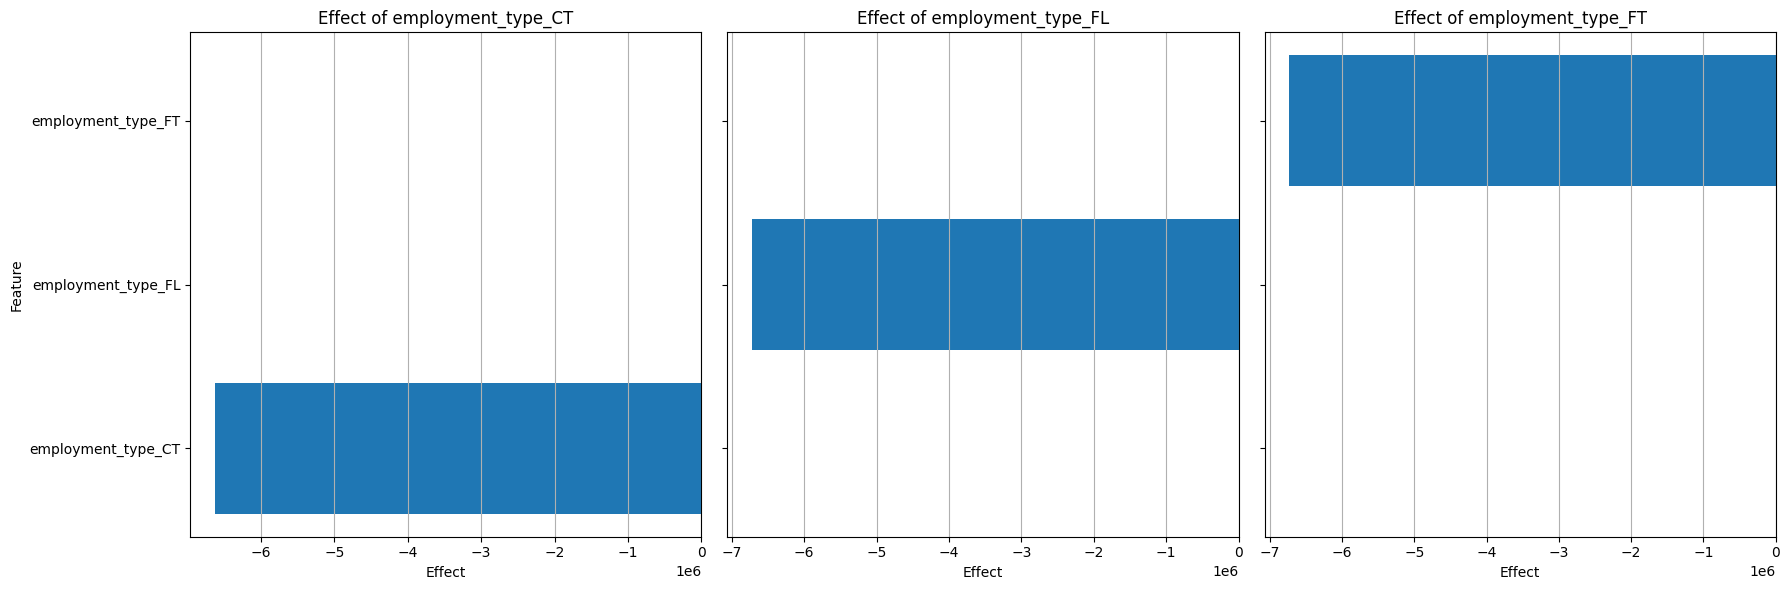

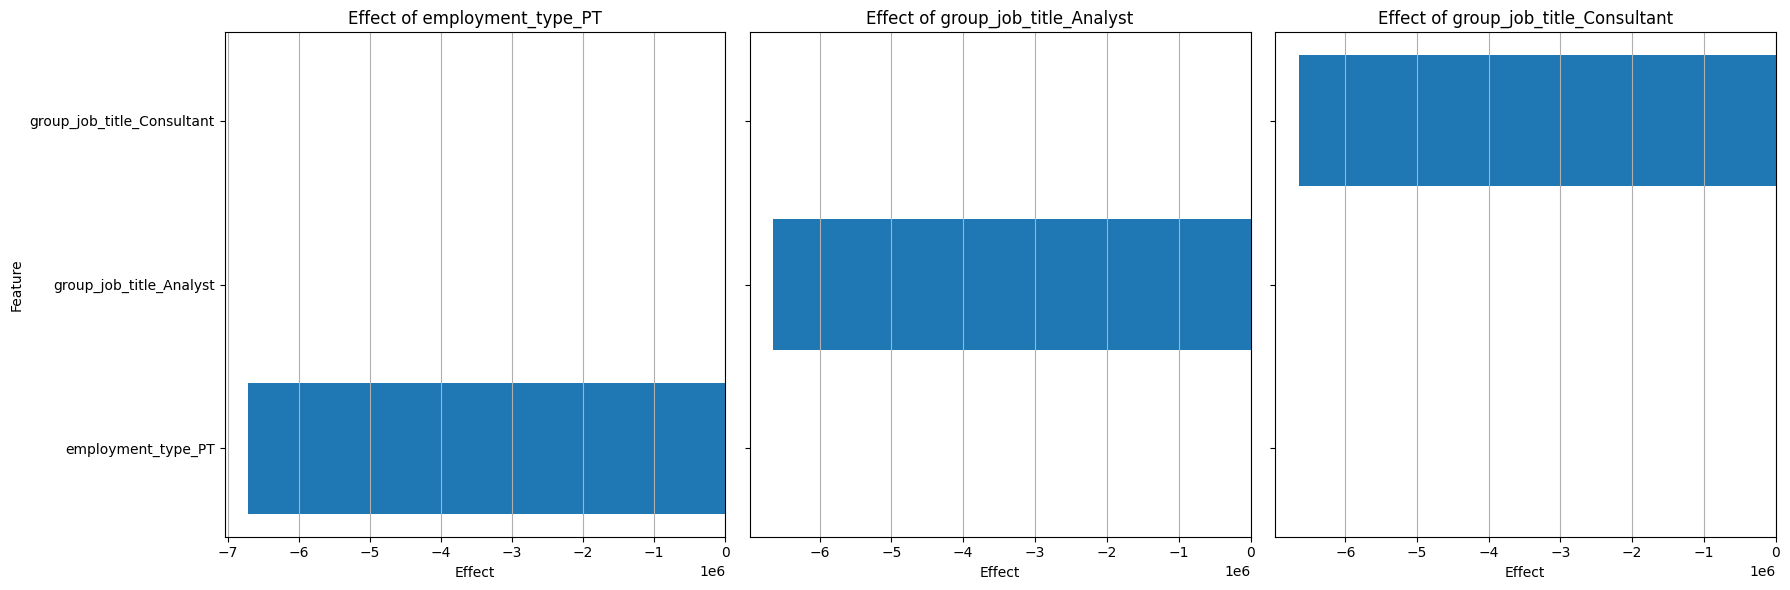

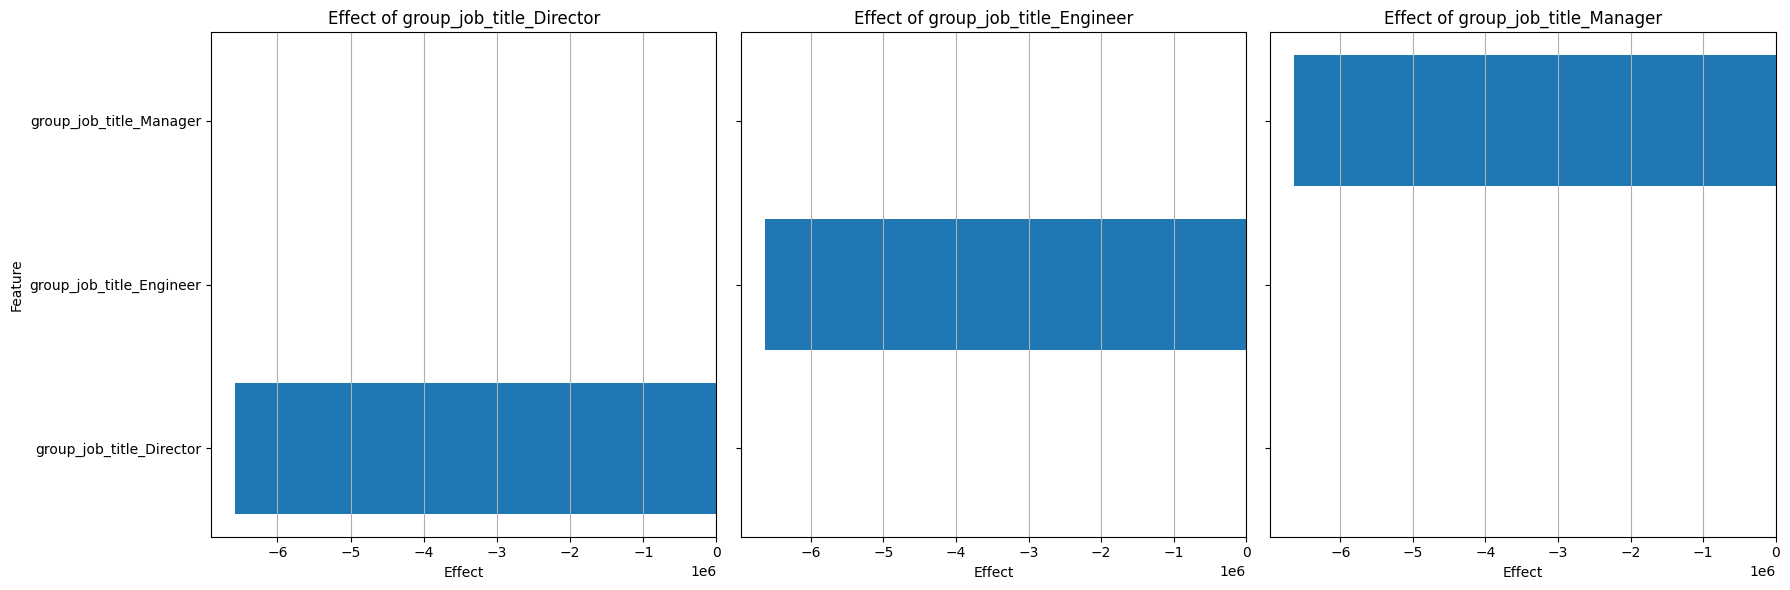

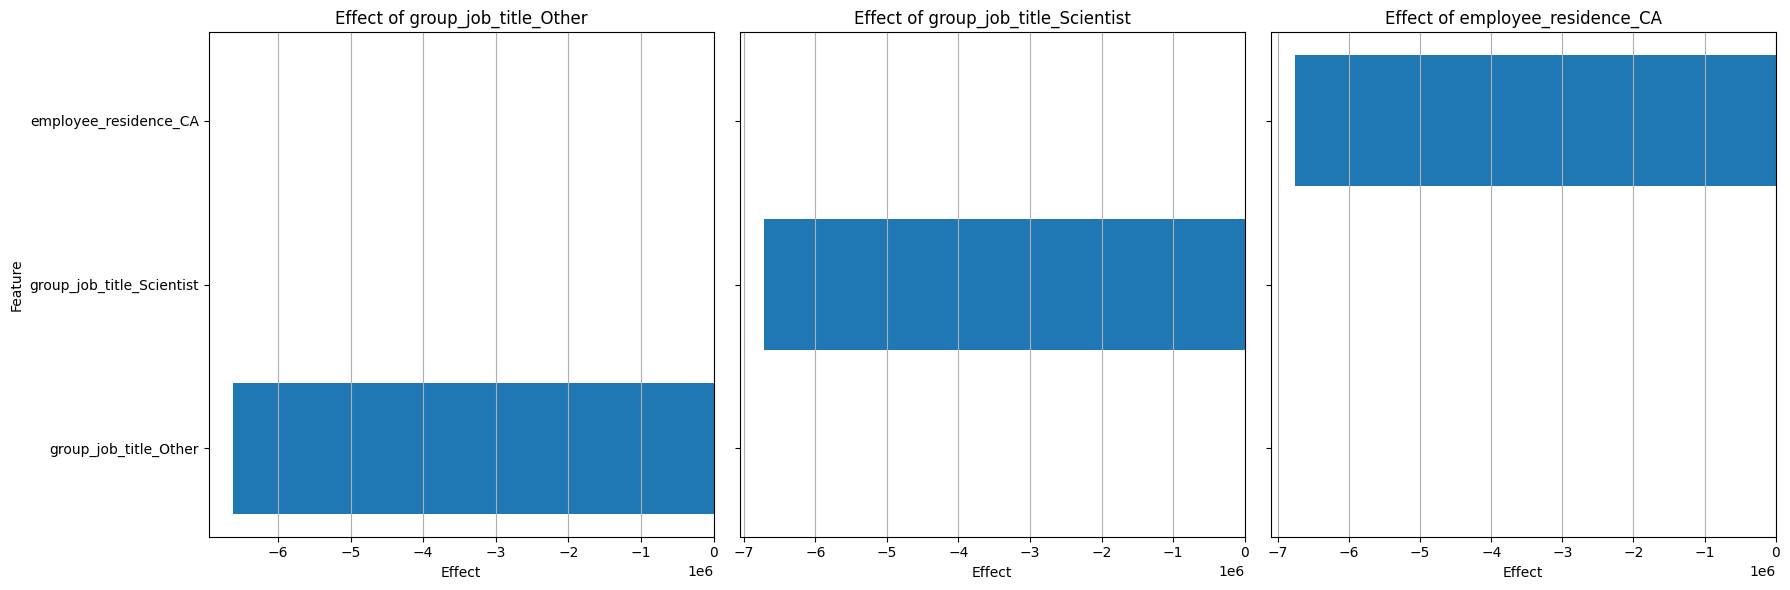

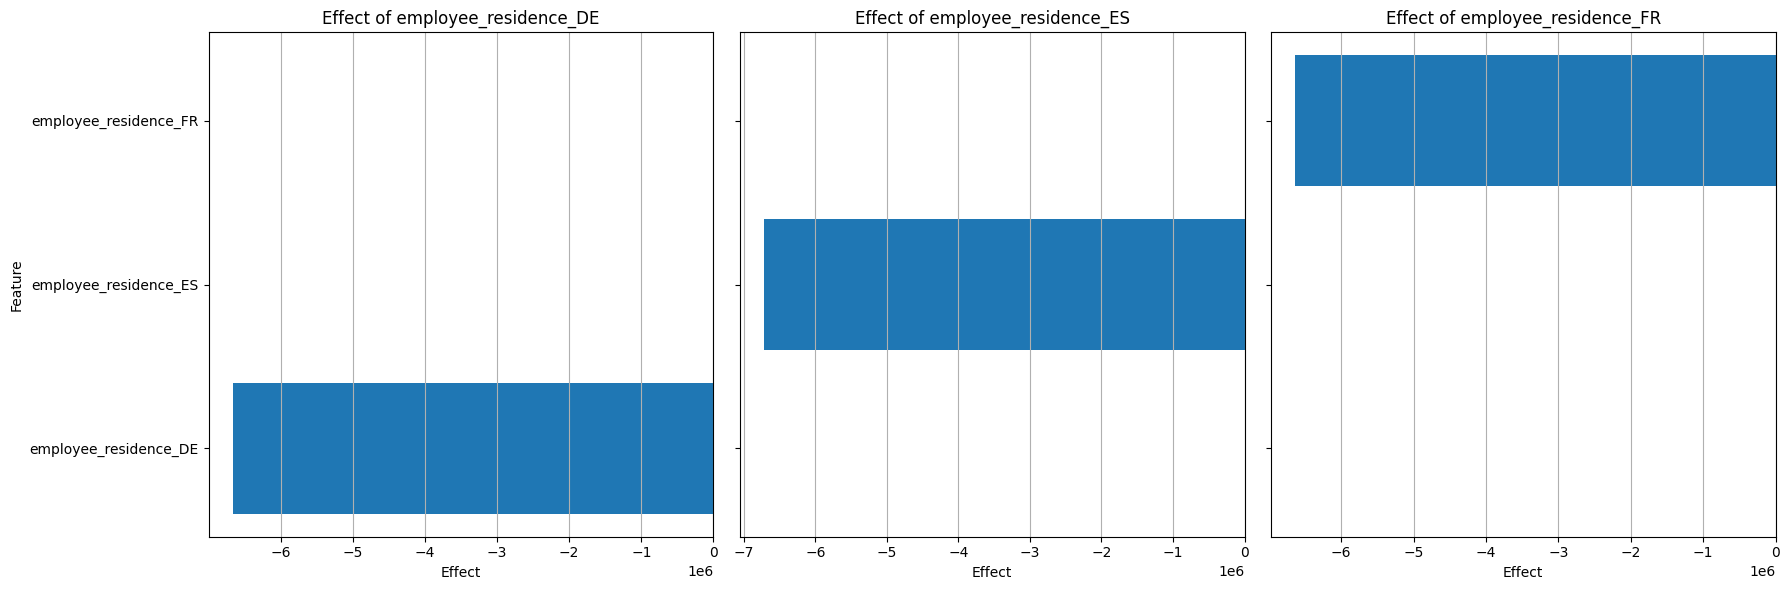

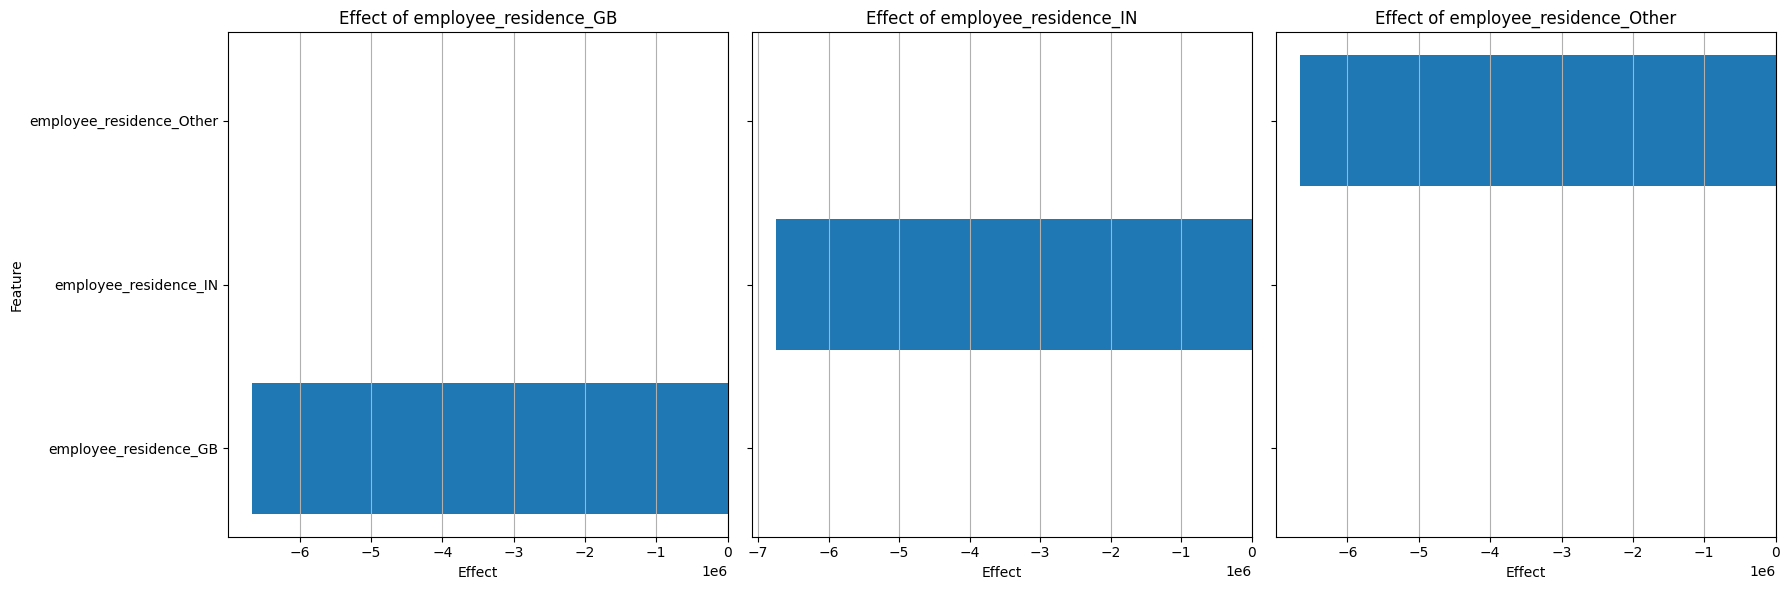

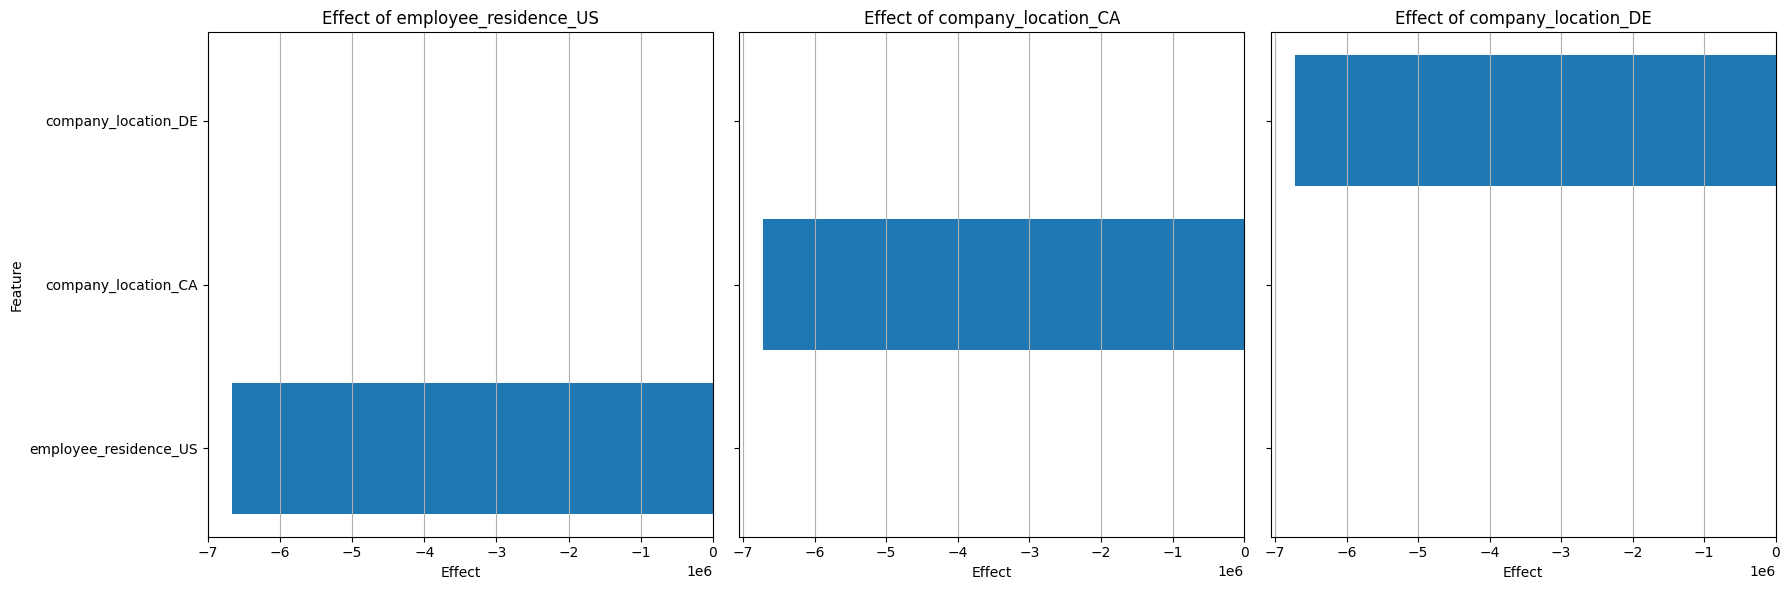

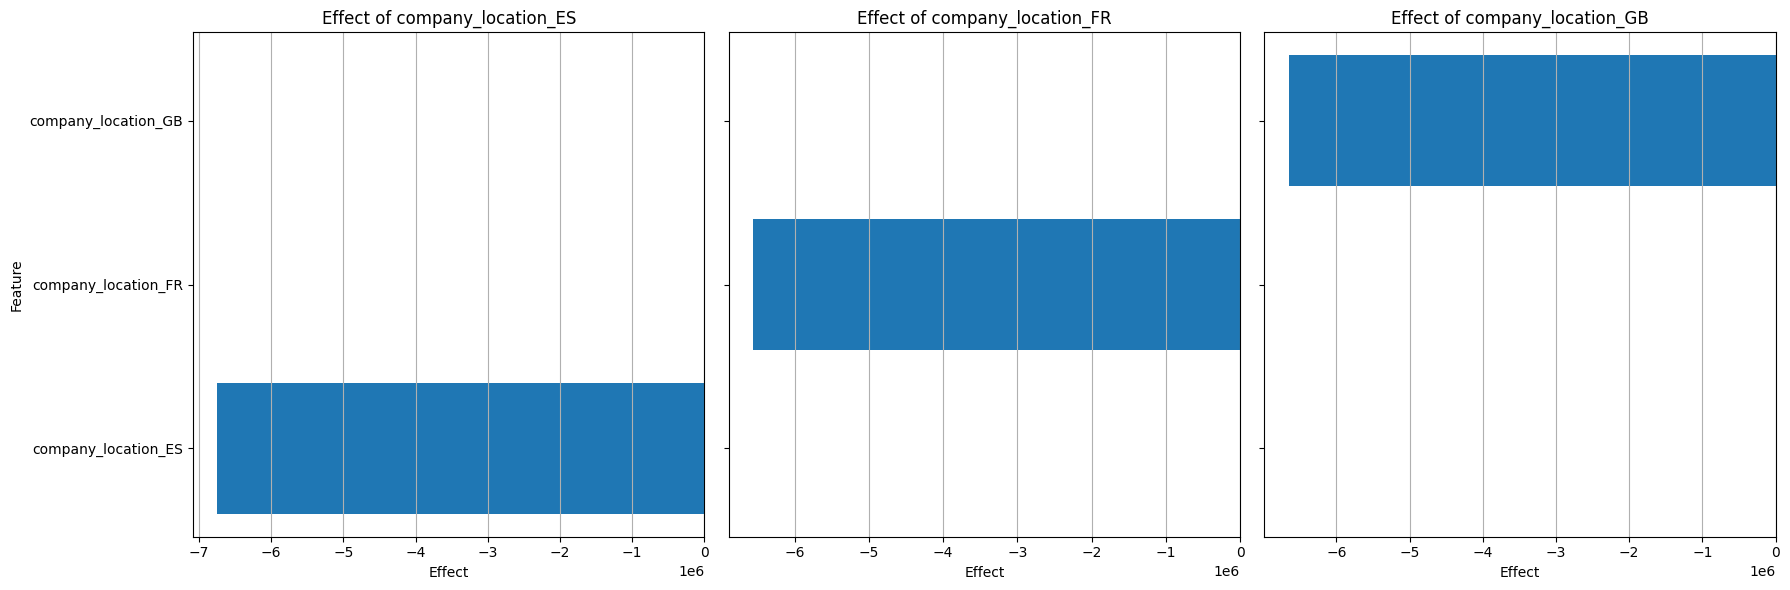

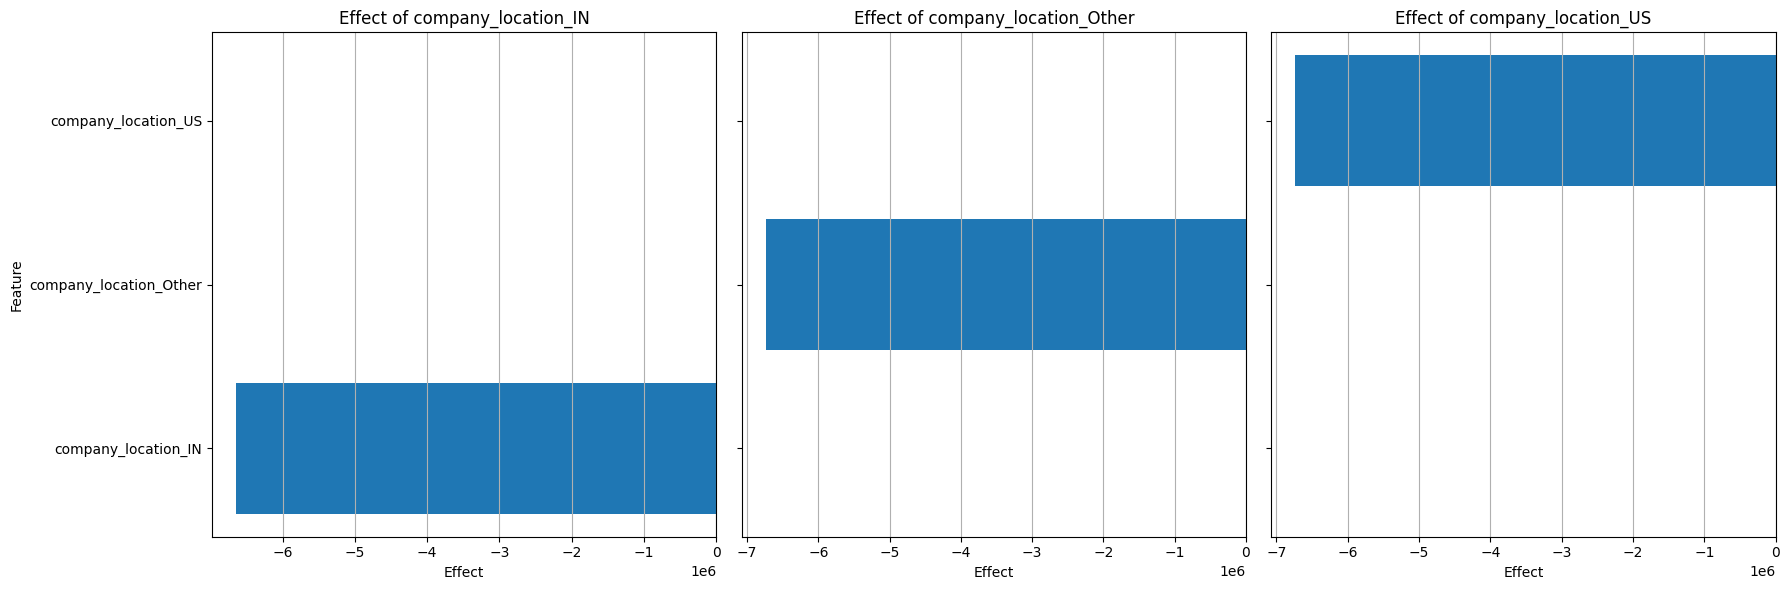

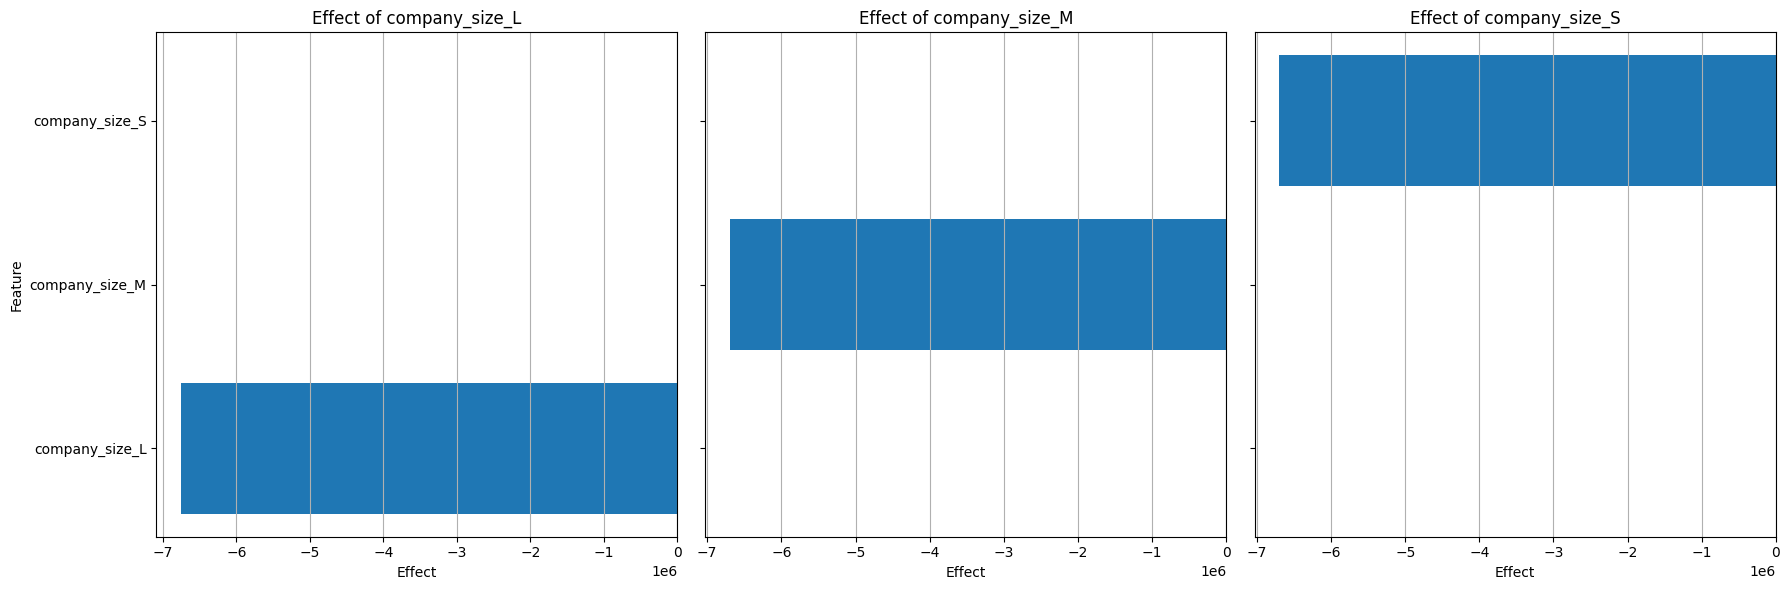

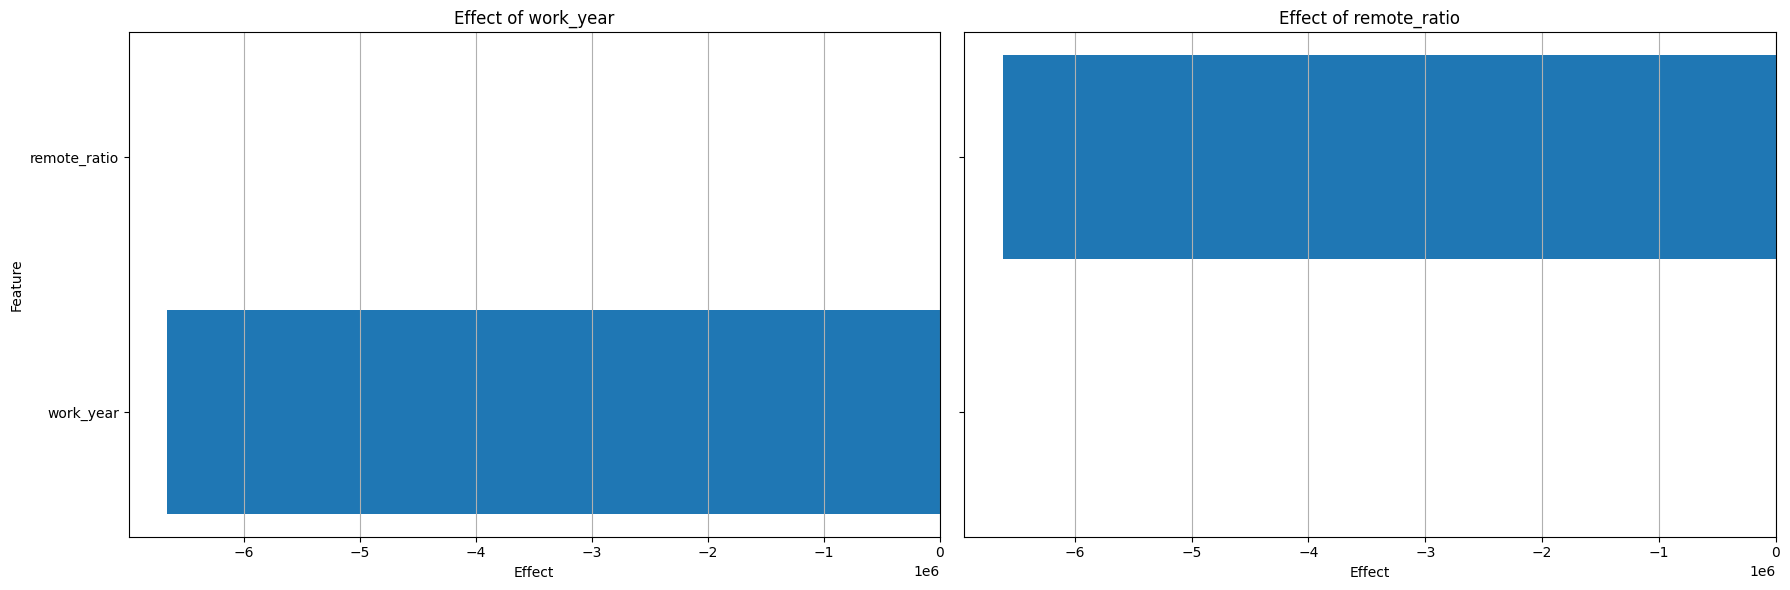

In [ ]:
import math

# Calculate the effects for each feature
effects = coefficients[1:] * X_train.T  # Exclude the intercept

# Define the number of plots per figure
plots_per_figure = 3

# Calculate the number of figures needed
num_features = len(all_feature_names[1:])
num_figures = math.ceil(num_features / plots_per_figure)

# Create separate figures and plots for each group of features
for fig_num in range(num_figures):
    start_feature = fig_num * plots_per_figure
    end_feature = min((fig_num + 1) * plots_per_figure, num_features)

    # Create a figure with subplots for this group of features
    fig, axs = plt.subplots(nrows=1, ncols=end_feature - start_feature, figsize=(18, 6), sharey=True)

    # Iterate through each feature in this group and create individual effect plots
    for i, feature_index in enumerate(range(start_feature, end_feature)):
        feature_name = all_feature_names[1:][feature_index]
        axs[i].barh([feature_name], effects[feature_index].mean())
        axs[i].set_xlabel('Effect')
        axs[i].set_title(f'Effect of {feature_name}')
        axs[i].grid(axis='x')

    # Set common ylabel
    axs[0].set_ylabel('Feature')

    # Adjust spacing between subplots
    plt.tight_layout()

    # Show the plot for this group of features
    plt.show()


In [ ]:
print(coefficients[1:].shape)
print(X_train.T.shape)
print(effects.shape)

(36,)
(36, 485)
(485,)
